In [13]:
import fastbook
import fastai
from playsound import playsound
from fastai import *
from fastai.vision.all import *


def is_cat(x):
    if x[0]=="c": return(True)
    else:return(False)

def True_or_false(x):
    a=x[0]/x[1]
    if a<1: return 1
    else: return 0

path=Path('C:/Users/tal09/OneDrive/Desktop/d_v_c')
Path.BASE_PATH = path
files = get_image_files(path/'train')#מאגר של 2000 תמונות ללמידה
files1 = get_image_files(path/'train1')#מאגר של 24,698 תמונות ללמידה
files_test= get_image_files(path/'test')#מאגר של 502 תמונות לבחינה
#failed = verify_images(files)
#failed.map(Path.unlink)


dls = ImageDataLoaders.from_name_func(path, files, valid_pct=0.2, seed=42,label_func=is_cat, item_tfms=Resize(224), num_workers=0)
dls1= ImageDataLoaders.from_name_func(path, files1, valid_pct=0.05, seed=42,label_func=is_cat ,item_tfms=RandomResizedCrop(224, min_scale=0.4), num_workers=0)

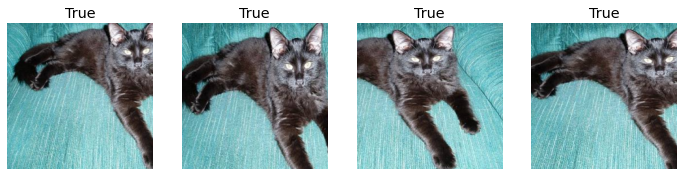

In [137]:
dls1.show_batch(max_n=4, nrows=1, unique=True)

In [3]:
learn = cnn_learner(dls, resnet34(pretrained=True), metrics=error_rate)
learn.fine_tune(1,base_lr=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.455832,0.037025,0.015000,09:43


epoch,train_loss,valid_loss,error_rate,time
0,0.101124,0.048056,0.017500,12:50


In [8]:
learn.fine_tune(2,base_lr=10**(-4))

playsound('alarmsoundeffects.mp3')

epoch,train_loss,valid_loss,error_rate,time
0,0.044438,0.041267,0.017500,05:12


epoch,train_loss,valid_loss,error_rate,time
0,0.048718,0.038635,0.015000,07:02
1,0.041129,0.039006,0.017500,07:15


SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=1.5848931980144698e-06)

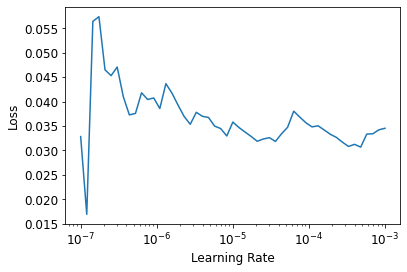

In [9]:
learn.lr_find()

In [168]:
dls_test=learn.dls.test_dl(files_test,label_func=is_cat)
test=learn.get_preds(dl=dls_test)[0]

In [170]:
predictions=[True_or_false(x) for x in test]

In [171]:
y_test=[int(is_cat(x.__str__().replace('C:\\Users\\tal09\\OneDrive\\Desktop\\d_v_c\\test\\', ''))) for x in files_test]

In [172]:
com_res=[y_test[x]==predictions[x] for x in range(len(files_test))]

In [173]:
int(sum(com_res))/len(files_test)*100

98.00796812749005

In [174]:
path=Path('C:/Users/tal09/2practice')
learn.path=path

In [175]:
learn.export(fname='pretrained.pkl')

PicklingError: Can't pickle <function is_cat at 0x0000019EC40ED438>: it's not the same object as __main__.is_cat

In [176]:
path.ls(file_exts='.pkl')

(#2) [Path('C:/Users/tal09/2practice/pretrained.pkl'),Path('C:/Users/tal09/2practice/save_pretrained.pkl')]

In [256]:
#second version: non pretrained model

In [15]:
learn1 = cnn_learner(dls1,resnet18, metrics=error_rate,pretrained=False)
learn1.fit(1,base_lr=0.002)

epoch,train_loss,valid_loss,error_rate,time
0,0.702003,0.602267,0.320908,1:17:53


In [19]:
learn1.fit(4,base_lr=10**(-3))

playsound('alarmsoundeffects.mp3')

epoch,train_loss,valid_loss,error_rate,time
0,0.334769,0.368341,0.170989,58:11
1,0.275350,0.266715,0.123177,50:15
2,0.243605,0.347517,0.151540,49:40
3,0.220240,0.265951,0.108590,54:49


In [26]:
learn1.fit(5,base_lr=10**(-3.8))
playsound('alarmsoundeffects.mp3') 

epoch,train_loss,valid_loss,error_rate,time
0,0.151510,0.154064,0.067261,53:13
1,0.155965,0.158300,0.063209,54:01
2,0.124285,0.179108,0.072123,57:35
3,0.135141,0.299840,0.124797,54:08
4,0.118893,0.149732,0.062399,55:12


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.918309736647643e-06)

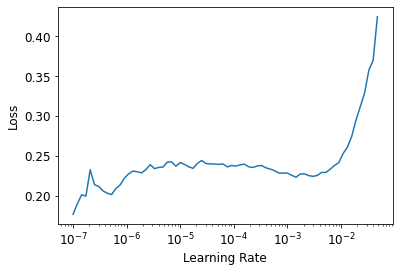

In [96]:
learn1.lr_find()

In [27]:
dls_test1=learn1.dls.test_dl(files_test,label_func=is_cat)
test1=learn1.get_preds(dl=dls_test1)[0]

In [28]:
predictions1=[True_or_false(x) for x in test1]

In [29]:
y1_test=[int(is_cat(x.__str__().replace('C:\\Users\\tal09\\OneDrive\\Desktop\\d_v_c\\test\\', ''))) for x in files_test]

In [30]:
com_res1=[y1_test[x]==predictions1[x] for x in range(len(files_test))]

In [31]:
int(sum(com_res1))/len(files_test)*100

95.4183266932271

In [134]:
pwd

'C:\\Users\\tal09\\2practice'

In [141]:
help(Learner)

Help on class Learner in module fastai.learner:

class Learner(builtins.object)
 |  Learner(dls, model, loss_func=None, opt_func=<function Adam at 0x0000019EE7E4D048>, lr=0.001, splitter=<function trainable_params at 0x0000019EE6BF4048>, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
 |  
 |  Group together a `model`, some `dls` and a `loss_func` to handle training
 |  
 |  Methods defined here:
 |  
 |  __call__(self, event_name)
 |      Call `event_name` for all `Callback`s in `self.cbs`
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_value, tb)
 |  
 |  __init__(self, dls, model, loss_func=None, opt_func=<function Adam at 0x0000019EE7E4D048>, lr=0.001, splitter=<function trainable_params at 0x0000019EE6BF4048>, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
 |      Initialize self.  See help(type(self)) for accurate sign